# Stock Market Prediction And Forecasting Using Stacked LSTM

In [4]:
import pandas_datareader as pdr

In [5]:
key='########################'

In [6]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,AAPL,2015-07-13 00:00:00+00:00,115.798631,115.886175,114.563789,115.218071,41440538,125.66,0.0,125.755,124.32,125.03,1.0,41440538
1,AAPL,2015-07-14 00:00:00+00:00,115.752554,116.452912,115.227286,116.148810,31768139,125.61,0.0,126.370,125.04,126.04,1.0,31768139
2,AAPL,2015-07-15 00:00:00+00:00,116.867598,117.171700,115.724909,115.853922,33649200,126.82,0.0,127.150,125.58,125.72,1.0,33649200
3,AAPL,2015-07-16 00:00:00+00:00,118.424972,118.480264,117.356005,117.715399,36222447,128.51,0.0,128.570,127.35,127.74,1.0,36222447
4,AAPL,2015-07-17 00:00:00+00:00,119.447863,119.447863,118.240668,118.950241,46164710,129.62,0.0,129.620,128.31,129.08,1.0,46164710


In [11]:
df.tail()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
1253,AAPL,2020-07-02 00:00:00+00:00,364.11,370.47,363.64,367.85,28814500,364.11,0.0,370.47,363.64,367.85,1.0,28814500
1254,AAPL,2020-07-06 00:00:00+00:00,373.85,375.78,369.87,370.00,29745900,373.85,0.0,375.78,369.87,370.00,1.0,29745900
1255,AAPL,2020-07-07 00:00:00+00:00,372.69,378.62,372.23,375.41,28207000,372.69,0.0,378.62,372.23,375.41,1.0,28207000
1256,AAPL,2020-07-08 00:00:00+00:00,381.37,381.50,376.36,376.72,29274500,381.37,0.0,381.50,376.36,376.72,1.0,29274500
1257,AAPL,2020-07-09 00:00:00+00:00,382.73,393.91,378.69,385.05,31420400,382.73,0.0,393.91,378.69,385.05,1.0,31420400


In [12]:
df1=df.reset_index()['close']

In [13]:
df1.head()

0    125.66
1    125.61
2    126.82
3    128.51
4    129.62
Name: close, dtype: float64

In [14]:
df1.shape

(1258,)

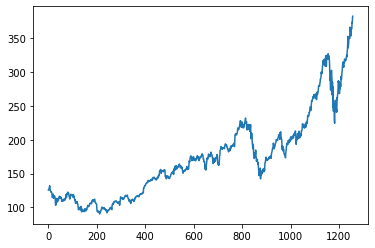

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [17]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
df1=mms.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1

array([[0.12079756],
       [0.12062656],
       [0.12476487],
       ...,
       [0.9656623 ],
       [0.99534868],
       [1.        ]])

**Splitting into training and test date**

In [23]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size

817

In [25]:
test_size

441

In [27]:
import numpy as np

In [32]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [33]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [34]:
X_train

array([[0.12079756, 0.12062656, 0.12476487, ..., 0.09394986, 0.09562571,
        0.09234242],
       [0.12062656, 0.12476487, 0.13054482, ..., 0.09562571, 0.09234242,
        0.08871712],
       [0.12476487, 0.13054482, 0.13434112, ..., 0.09234242, 0.08871712,
        0.08502343],
       ...,
       [0.34098293, 0.3360238 , 0.33451896, ..., 0.46037826, 0.46308013,
        0.46827867],
       [0.3360238 , 0.33451896, 0.32867061, ..., 0.46308013, 0.46827867,
        0.47518725],
       [0.33451896, 0.32867061, 0.33462157, ..., 0.46827867, 0.47518725,
        0.4847293 ]])

In [35]:
X_train.shape

(716, 100)

In [36]:
y_train.shape

(716,)

In [37]:
X_test.shape

(340, 100)

In [38]:
y_test.shape

(340,)

**Stacked LSTM**

In [39]:
# reshape input to  [samples, time steps, features]  for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

Instructions for updating:
Use tf.cast instead.


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=100,verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
716/716 [==============================] - 17s 24ms/sample - loss: 0.0178 - val_loss: 0.0291
Epoch 2/100
716/716 [==============================] - 7s 9ms/sample - loss: 0.0032 - val_loss: 0.0038
Epoch 3/100
716/716 [==============================] - 6s 9ms/sample - loss: 7.1721e-04 - val_loss: 0.0048
Epoch 4/100
716/716 [==============================] - 7s 9ms/sample - loss: 4.5132e-04 - val_loss: 0.0028
Epoch 5/100
716/716 [==============================] - 7s 9ms/sample - loss: 4.1762e-04 - val_loss: 0.0026
Epoch 6/100
716/716 [==============================] - 7s 10ms/sample - loss: 3.8050e-04 - val_loss: 0.0026
Epoch 7/100
716/716 [==============================] - 6s 9ms/sample - loss: 3.7674e-04 - val_loss: 0.0025
Epoch 8/100
716/716 [==============================] - 7s 9ms/sample - loss: 3.6786e-04 - val_loss: 0.0025
Epoch 9/100
716/716 [==============================] - 

716/716 [==============================] - 7s 9ms/sample - loss: 1.5983e-04 - val_loss: 7.9554e-04
Epoch 74/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.3459e-04 - val_loss: 7.9640e-04
Epoch 75/100
716/716 [==============================] - 7s 9ms/sample - loss: 1.3820e-04 - val_loss: 0.0011
Epoch 76/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.6716e-04 - val_loss: 0.0011
Epoch 77/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.5378e-04 - val_loss: 8.7909e-04
Epoch 78/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.3699e-04 - val_loss: 8.9621e-04
Epoch 79/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.2812e-04 - val_loss: 7.3555e-04
Epoch 80/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.2328e-04 - val_loss: 7.5844e-04
Epoch 81/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.2936e-04 - val_loss: 0.0010
Epoch 82/1

In [48]:
import tensorflow as tf

In [49]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
##Transformback to original form
train_predict=mms.inverse_transform(train_predict)
test_predict=mms.inverse_transform(test_predict)

In [52]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

148.0584123162192

In [53]:
math.sqrt(mean_squared_error(y_test,test_predict))

256.49213549405766

**Plotting**

In [56]:
# shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

In [57]:
# shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

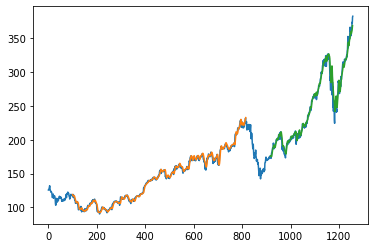

In [60]:
plt.plot(mms.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [61]:
len(test_data)

441

In [63]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[0.782037689387462,
 0.7978385033687881,
 0.7864838058757139,
 0.7616881562296932,
 0.7108314237833032,
 0.6762885187591914,
 0.6919183282602003,
 0.626492014090769,
 0.6259447997537536,
 0.7129860802353022,
 0.6805294298710626,
 0.7264270323882486,
 0.6928417524539142,
 0.6795376038852217,
 0.6013543554841138,
 0.6669174732377987,
 0.6330243852388933,
 0.5399979479462361,
 0.6417114128390164,
 0.5194090085160231,
 0.555832962823626,
 0.5346626081603337,
 0.5281986388043367,
 0.4750504463216937,
 0.45839460993878034,
 0.5353808269776668,
 0.530729505113034,
 0.574917062827046,
 0.5383221040391258,
 0.562502137556004,
 0.5607236909607031,
 0.5149628920277711,
 0.5287116522452888,
 0.516672936830945,
 0.5887000239406273,
 0.5783029515373302,
 0.6010123465234789,
 0.6075789185676664,
 0.6255685898970553,
 0.6727658264646534,
 0.6638051916960225,
 0.6715345942063682,
 0.6582304456376757,
 0.6381545196484147,
 0.6088785526180786,
 0.6353158452751463,
 0.6316563493963541,
 0.6588118608707548

**Prediction for next 30 days**

In [67]:
from numpy import array
n_steps=100
output=[]
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(temp_input)
        output.extend(yhat.tolist())
        i=i+1

[0.979924]
[0.782037689387462, 0.7978385033687881, 0.7864838058757139, 0.7616881562296932, 0.7108314237833032, 0.6762885187591914, 0.6919183282602003, 0.626492014090769, 0.6259447997537536, 0.7129860802353022, 0.6805294298710626, 0.7264270323882486, 0.6928417524539142, 0.6795376038852217, 0.6013543554841138, 0.6669174732377987, 0.6330243852388933, 0.5399979479462361, 0.6417114128390164, 0.5194090085160231, 0.555832962823626, 0.5346626081603337, 0.5281986388043367, 0.4750504463216937, 0.45839460993878034, 0.5353808269776668, 0.530729505113034, 0.574917062827046, 0.5383221040391258, 0.562502137556004, 0.5607236909607031, 0.5149628920277711, 0.5287116522452888, 0.516672936830945, 0.5887000239406273, 0.5783029515373302, 0.6010123465234789, 0.6075789185676664, 0.6255685898970553, 0.6727658264646534, 0.6638051916960225, 0.6715345942063682, 0.6582304456376757, 0.6381545196484147, 0.6088785526180786, 0.6353158452751463, 0.6316563493963541, 0.6588118608707548, 0.6594958787920244, 0.643797667498

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [70]:
len(df1)

1258

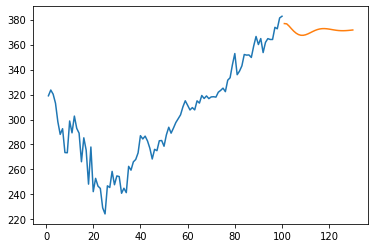

In [71]:
plt.plot(day_new,mms.inverse_transform(df1[1158:]))
plt.plot(day_pred,mms.inverse_transform(output))
plt.show()

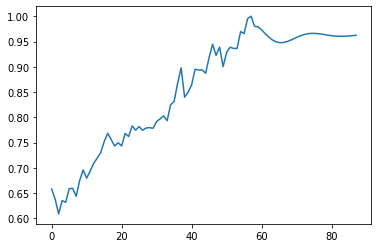

In [72]:
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[1200:])
plt.show()

In [74]:
df3=mms.inverse_transform(df3).tolist()

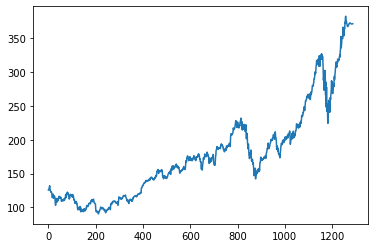

In [75]:
plt.plot(df3)
plt.show()